In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unidecode

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.db_functions import create_sql_alchemy_db_engine
from src.helpers import remove_accents
from src.plot_helpers import set_matplotlib_defaults

In [3]:
set_matplotlib_defaults()


In [4]:
conn = create_sql_alchemy_db_engine()

In [7]:
reviews = pd.read_sql("SELECT * FROM order_reviews", conn)

In [16]:
reviews.describe(datetime_is_numeric=True)

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938432
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [18]:
reviews.isna().sum() / len(reviews)

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

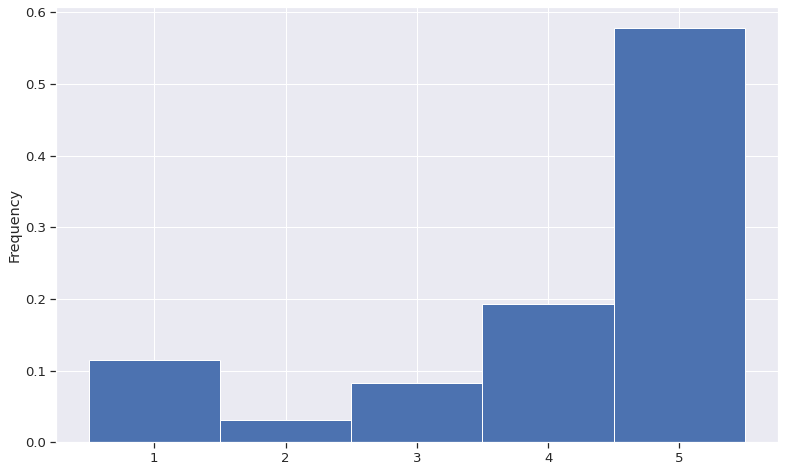

In [27]:
reviews.review_score.plot.hist(bins=[0.5,1.5,2.5 , 3.5, 4.5, 5.5], density=True)